## Set WD

In [1]:
import os
os.chdir("/home/sgf2/DBMI_server/adversarial_attacks/melanoma/")

FileNotFoundError: [Errno 2] No such file or directory: '/home/sgf2/DBMI_server/adversarial_attacks/melanoma/'

In [1]:
import scipy.stats as st
from tensorflow import keras 
from sklearn import metrics
from sklearn.metrics import auc

def mean_ci(x):
    mn = np.mean(x)
    ci = st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    return (mn, ci[0], ci[1])

def printResults(model_preds, y_test):
    acc = np.mean(np.round(model_preds)[:,0] == y_test[:,0])
    print('Test accuracy: %0.4f' % acc)

    fpr, tpr, thresholds = metrics.roc_curve(y_test[:,1], model_preds[:,1])
    auc_score = auc(fpr,tpr)
    print('AUC: %0.4f' % auc_score)

    conf = mean_ci(np.max(model_preds, axis = 1))
    print('Avg. Confidence: ' + '{0:.6f} '.format(conf[0]) + \
          '({0:.6f}'.format(conf[1]) + ' - {0:.6f})'.format(conf[2]))

## Set up

In [22]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
from craft_attack_patch import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Adversarial Patch Attack

## Train Patches

In [5]:
# Hyperparameters
epochs = 7
learning_rate = 5.0

# Load the models
resnet1 = ModelContainer('resnet1')
resnet2 = ModelContainer('resnet2')

# White Box
model = resnet1

Finished loading resnet1, took 13s
Finished loading resnet2, took 13s


In [6]:
# Target 0
train(model, target_label=0, epochs=epochs, learning_rate=learning_rate)
file_name = './patches/resnet1_patch_target0_epoch' + str(epochs) + '_wb.npy'
np.save(file_name, model.patch())

# Target 1
train(model, target_label=1, epochs=epochs, learning_rate=learning_rate)
file_name = './patches/resnet1_patch_target1_epoch' + str(epochs) + '_wb.npy'
np.save(file_name, model.patch())

# Black Box
model = resnet2

# Target 0
train(model, target_label=0, epochs=epochs, learning_rate=learning_rate)
file_name = './patches/resnet1_patch_target0_epoch' + str(epochs) + '_bb.npy'
np.save(file_name, model.patch())

# Target 1
train(model, target_label=1, epochs=epochs, learning_rate=learning_rate)
file_name = './patches/resnet1_patch_target1_epoch' + str(epochs) + '_bb.npy'
np.save(file_name, model.patch())

(minibatch 0) loss: 0.11234987
(minibatch 1) loss: 0.038404785
Loss after epoch 0: 0.07537732645869255
(minibatch 0) loss: 0.06385477
(minibatch 1) loss: 0.04446815
Loss after epoch 1: 0.05416145920753479
(minibatch 0) loss: 0.047504876
(minibatch 1) loss: 0.014648043
Loss after epoch 2: 0.0310764592140913
(minibatch 0) loss: 0.013488336
(minibatch 1) loss: 0.020036435
Loss after epoch 3: 0.01676238514482975
(minibatch 0) loss: 0.020569544
(minibatch 1) loss: 0.017857594
Loss after epoch 4: 0.019213569350540638
(minibatch 0) loss: 0.026378911
(minibatch 1) loss: 0.0160901
Loss after epoch 5: 0.02123450580984354
(minibatch 0) loss: 0.006932576
(minibatch 1) loss: 0.01038122
Loss after epoch 6: 0.00865689804777503
(minibatch 0) loss: 3.5460715
(minibatch 1) loss: 3.7859502
Loss after epoch 0: 3.666010856628418
(minibatch 0) loss: 2.2870343
(minibatch 1) loss: 2.638205
Loss after epoch 1: 2.462619662284851
(minibatch 0) loss: 1.4162176
(minibatch 1) loss: 1.0768589
Loss after epoch 2: 1.2

## Display Results

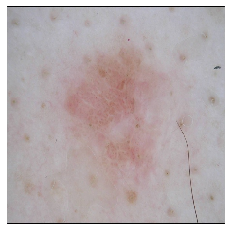

In [11]:
################################# THIS IS THE ONLY CELL THAT WAS ADDED #############
# Pick the images to show (attack). Here I randomly chose 2 from each class
show(image_loader.X_test[3]) # label 0
# show(image_loader.X_test[200]) # label 0 
# show(image_loader.X_test[401]) # label 1
# show(image_loader.X_test[453]) # label 1

In [12]:
################################# THIS IS THE ONLY CELL THAT WAS MODIFIED #############
epochs = 7
# Load the models
resnet1 = ModelContainer('resnet1')
resnet2 = ModelContainer('resnet2')

# Loading the patch file 
resnet1_patch_target1_wb = np.load('./patches/resnet1_patch_target1_epoch' + str(epochs) + '_wb.npy')
resnet1_patch_target0_wb = np.load('./patches/resnet1_patch_target0_epoch' + str(epochs) + '_wb.npy')

Finished loading resnet1, took 12s
Finished loading resnet2, took 12s


8   [ 8  9 10 11 12 13 14 15]   [8]


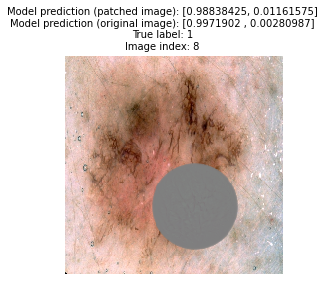

0   [0 1 2 3 4 5 6 7]   [0]


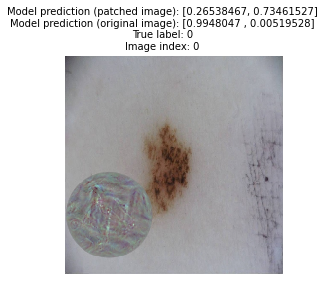

White Box:
Test accuracy: 0.0000
AUC: 0.0000
Avg. Confidence: 0.904076 (0.829277 - 0.978875)


In [26]:
# Indices of images to show (use n_show=0 when using show_indices feature)
show_indices0 = [8] # attack with target label 0
show_indices1 = [0]

# Apply
scale = 0.4
probs_patched_images, probs_original_images,indices, true_labels, winp = attack_combined(resnet1,patch_for_0=resnet1_patch_target0_wb,
                                                                         patch_for_1=resnet1_patch_target1_wb,
                                                                         n_show=0, scale=scale,
                                                                         show_indices0=show_indices0,
                                                                         show_indices1=show_indices1,
                                                                         predict_original=False
                                                                                        )


# Print
print("White Box:")
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))

8   [ 8  9 10 11 12 13 14 15]   [8]


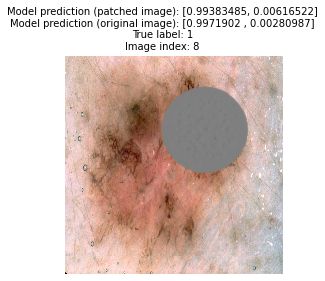

0   [0 1 2 3 4 5 6 7]   [0]


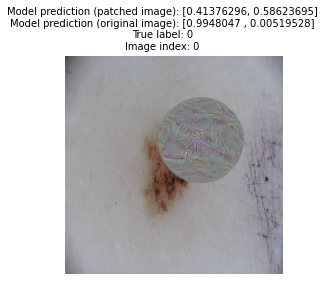


Black Box:
Test accuracy: 0.1250
AUC: 0.0000
Avg. Confidence: 0.866488 (0.779957 - 0.953018)


In [27]:
# Loading the patch file 
resnet1_patch_target1_bb = np.load('./patches/resnet1_patch_target1_epoch7_bb.npy')
resnet1_patch_target0_bb = np.load('./patches/resnet1_patch_target0_epoch7_bb.npy')

# Apply
probs_patched_images, probs_original_images, indices, true_labels, winp = attack_combined(resnet1,patch_for_0=resnet1_patch_target0_bb,
                                                                         patch_for_1=resnet1_patch_target1_bb,
                                                                         n_show=0, scale=scale,
                                                                         show_indices0=show_indices0,
                                                                         show_indices1=show_indices1,
                                                                         predict_original=False
                                                                                        )
# Print
print("\nBlack Box:")
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))

# Photoshop Patch Attacks

In [28]:
# Combined attack with mole-patches
file_name0 = './patches/natural_patch_min_p.npy'
file_name1 = './patches/natural_patch_max_p.npy'
mole_patch0 = np.load(file_name0)
mole_patch1 = np.load(file_name1)
scale = 0.4
probs_patched_images, probs_original_images, indices, true_labels, winp = attack_combined(resnet1,patch_for_0=mole_patch0,
                                                                         patch_for_1=mole_patch1,
                                                                         n_show=0, scale=scale,
                                                                         show_indices0=show_indices0,
                                                                         show_indices1=show_indices1,
                                                                         predict_original=False
                                                                                        )
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))

FileNotFoundError: [Errno 2] No such file or directory: './patches/natural_patch_min_p.npy'

## Display just patch

In [29]:
import numpy as np
resnet1_patch_target1_bb = np.load('./patches/resnet1_patch_target1_epoch7_bb.npy')
resnet1_patch_target0_bb = np.load('./patches/resnet1_patch_target0_epoch7_bb.npy')
nat_min = './patches/natural_patch_min_p.npy'
nat_max = './patches/natural_patch_max_p.npy'

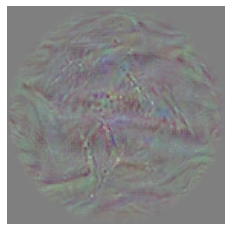

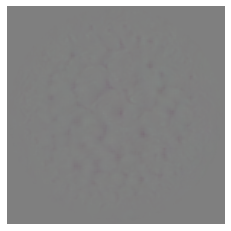

In [31]:
from copy import copy
def deprocess_inception(y):
    x = copy(y).astype(np.float)
    x += 1.
    x /= 2.
    #x *= 255.
    return x

import matplotlib.pyplot as plt
img = plt.imshow(deprocess_inception(resnet1_patch_target1_bb))
img.set_cmap('hot')
plt.axis('off')
plt.show()

img = plt.imshow(deprocess_inception(resnet1_patch_target0_bb))
img.set_cmap('hot')
plt.axis('off')
plt.show()

# img = plt.imshow(deprocess_inception(np.load(nat_min)))
# img.set_cmap('hot')
# plt.axis('off')
# plt.show()

# img = plt.imshow(deprocess_inception(np.load(nat_max)))
# img.set_cmap('hot')
# plt.axis('off')
# plt.show()